In [1]:
import sys

In [2]:
sys.path.append('/Users/chadestep/GitHub/chadestep/playing_with_python/python_scripts/')

In [3]:
import nuplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np
import pandas as pd
%matplotlib inline

# %load_ext autoreload
# %autoreload 2

# this isn't necessary, but goes a long way in helping
mpl.style.use('estep_style')

/Users/chadestep/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Make some data

In [4]:
# Signal data
np.random.seed(0)
noise   = (np.random.randn(1000))
x       = np.linspace(0,100,1000)
signal1 = np.array(np.pi*10*np.sin(x)+5*noise)
signal2 = np.array(np.pi*15*np.cos(x)+noise)

In [5]:
# Box and scatter plot data
binomial    = pd.Series(np.random.binomial(100,0.7,80),name='binomial')
exponential = pd.Series(np.random.exponential(5,90),name='exponenetial')
normal      = pd.Series(np.random.normal(40,20,100),name='normal')
rayleigh    = pd.Series(np.random.rayleigh(10, 70),name='rayleigh')
random1     = pd.Series(abs(np.random.randn(50))*10,name='random1')
random2     = pd.Series(abs(np.random.randn(200))*20,name='random2')
df_boxplot = pd.concat([binomial,exponential,normal,rayleigh,random1,random2],axis=1)
df_boxplot.head(5)

,binomial,exponenetial,normal,rayleigh,random1,random2
0,78,12.577097,50.046565,5.743346,1.474344,19.976976
1,69,2.651966,22.754660,17.508559,9.774649,14.802736
2,72,1.821138,43.213224,16.506574,8.793899,11.309956
3,77,14.328984,20.947101,26.125339,6.354245,9.520628
4,75,23.362800,72.170443,20.387159,5.426108,43.161371


In [6]:
# Raster data
nbins, sweeps = 100, 10
series_list = []
for i in range(sweeps):
    series_list.append(pd.Series(np.arange(nbins)[np.random.rand(nbins)<0.25],
                                 name='sweep{0}'.format(i+1)))
df_raster = pd.concat(series_list,axis=1)
df_raster.head(5)

,sweep1,sweep2,sweep3,sweep4,sweep5,sweep6,sweep7,sweep8,sweep9,sweep10
0,7,0,2,2,0,2,6,1,1,5
1,11,9,4,8,12,8,12,6,3,8
2,18,11,5,17,16,9,15,7,4,11
3,21,15,9,23,27,10,18,9,6,12
4,22,17,11,25,33,11,27,10,11,18


---
# <center>Matplotlib basics</center>
---

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='http://matplotlib.org/_images/fig_map.png')

Figure(800x400)
Axes(0.125,0.125;0.775x0.775)


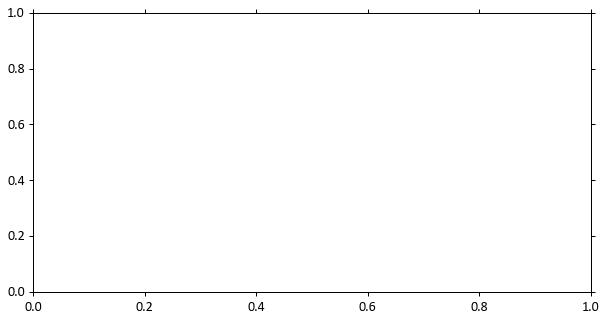

In [8]:
# plt.subplots?
fig, ax = plt.subplots()
print(fig)
print(ax)

Figure(800x400)


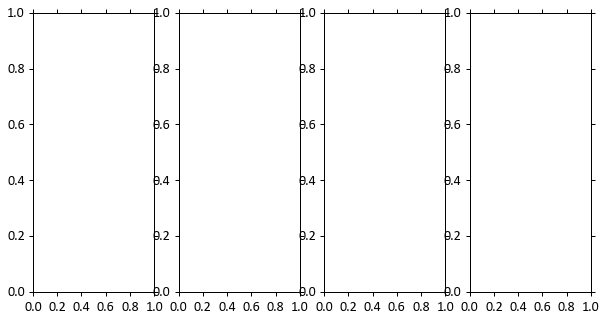

In [9]:
f, ax = plt.subplots(1,4) # (rows,columns)
print(f)
print(ax)

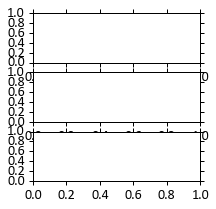

In [10]:
f, ax = plt.subplots(3, figsize=(3,3)) # (rows,columns)
# f.tight_layout()

# Gridspec pros and cons
- Pros: more flexibility
- Cons: more flexibility

[Gridspec](http://matplotlib.org/1.5.0/users/gridspec.html)

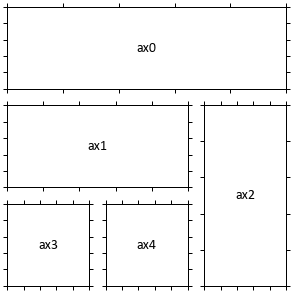

In [11]:
def label_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax{0}".format(i), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)
            
# make a figure
f = plt.figure(figsize=(5,5))

# add a 3x3 grid to the figure (row x column)
grid = gs.GridSpec(3,3)

# make axes that span grid subsections
ax1 = plt.subplot(grid[0,:])
ax2 = plt.subplot(grid[1,:2])
ax3 = plt.subplot(grid[1:,2:])
ax4 = plt.subplot(grid[2,0])
ax5 = plt.subplot(grid[2,1])

# plot the axes number on each
label_axes(f)

plt.show()

---
# Why is this important?

- The functions I wrote take a __figure__ or __axes__ object as an __input parameter__. This is to give you more flexibility at the cost of slightly more code

---

# <center>Nuplot (name?)</center>
---

## Cleaning up trace examples

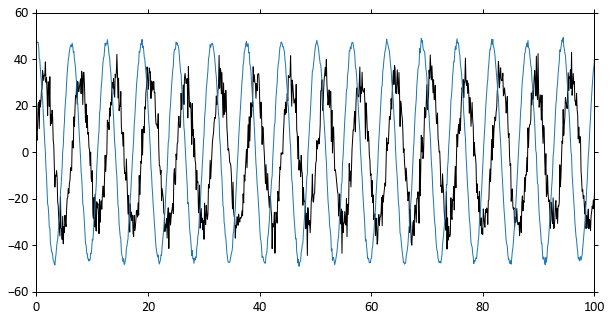

In [12]:
f, ax = plt.subplots() 
ax.plot(x,signal1)      # make the first plot
ax.plot(x,signal2)      # make the second plot on the same axes (overlay plots)
# ax.set_title('Add Title')
# ax.set_ylabel('Y label')
# ax.set_xlabel('X label')
plt.show()

# Simple axis/figure

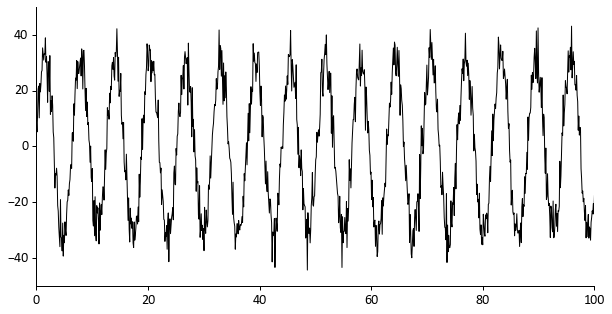

In [13]:
f, ax = plt.subplots()
ax.plot(x,signal1)

# parameters: matplotlib axes
nuplot.simple_axis(ax)
plt.show()

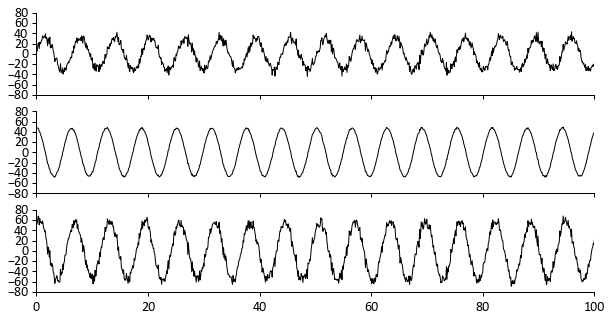

In [14]:
f, ax = plt.subplots(3, sharex=True, sharey=True) # 3 subplots. 3 rows, 1 column.
ax[0].plot(x,signal1)         # plot the first trace on the first axes
ax[1].plot(x,signal2)         # plot the second trace on the second axes
ax[2].plot(x,signal1+signal2) # plot the third trace on the third axes

# parameters: matplotlib figure
nuplot.simple_figure(f)

# equivalent to:
# nuplot.simple_axis(ax[0])
# nuplot.simple_axis(ax[1])
# nuplot.simple_axis(ax[2])

plt.show()

# Clean axis/figure

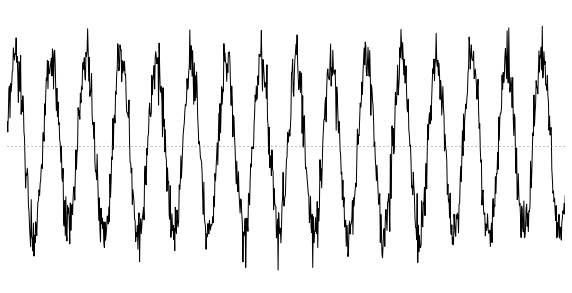

In [15]:
f, ax = plt.subplots()
ax.plot(x,signal1)

# parameters: matplotlib axes, y units, **line
# **line: neg_20=-20, thing=30, otherline=12
nuplot.clean_axis(ax,'mV',baseline=0)
plt.show()

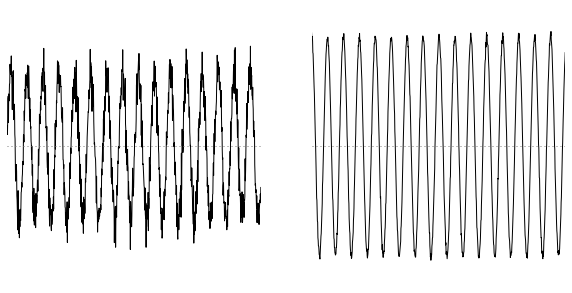

In [16]:
f, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].plot(x,signal1)
ax[1].plot(x,signal2)

# parameters: matplotlib figure, y units, **line
nuplot.clean_figure(f,'mV',baseline=0)
plt.show()

# Adding scalebars and a legend

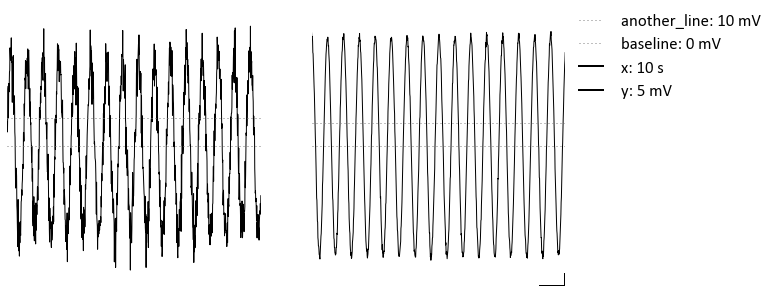

In [17]:
f, ax = plt.subplots(1,2)
ax[0].plot(x,signal1)
ax[1].plot(x,signal2)

# parameters: matplotlib figure, y units, **line
nuplot.clean_figure(f,'mV',baseline=0,another_line=10)

# parameters: matplotlib figure, x scale, x units, y scale, y units
nuplot.nu_legend(f, x_scale=10, x_units='s', y_scale=5, y_units='mV')
# nuplot.nu_legend(f, 10, 's', 5, 'mV')
plt.show()

# HAVE TO BE CAREFUL! WHAT AM I MISSING HERE? Hint: look to the previous cell

# Complex box, scatter, raster plots


You can make arbitrarily complex figures with just a few lines of code

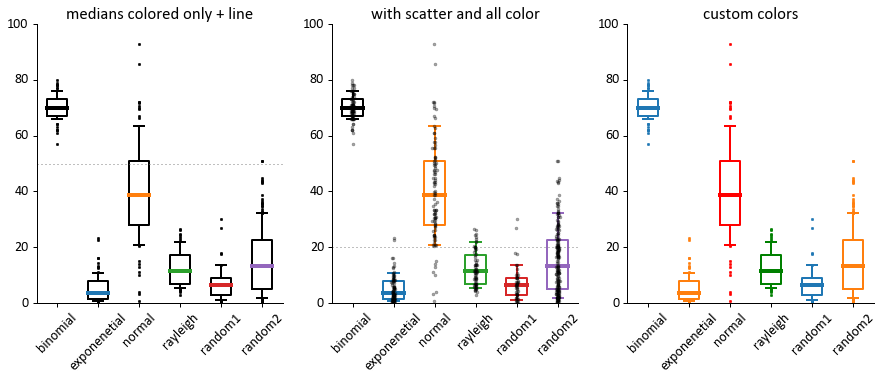

In [18]:
# set up the basic figure with subplots (pyplot for this example)
fig, ax = plt.subplots(1,3,figsize=(15,5))

# assign plots to specific subplot within the figure
bp0 = nuplot.nu_boxplot(ax[0],df_boxplot,medians_only=True,baseline=50)
# ORDER MATTERS!
sp0 = nuplot.nu_scatter(ax[1],df_boxplot,monocolor='000000',jitter=0.02,markersize=6)
bp1 = nuplot.nu_boxplot(ax[1],df_boxplot,show_outliers=False,baseline=20)
bp2 = nuplot.nu_boxplot(ax[2],df_boxplot,color_list=['#1f77b4','#ff7f0e','red','green'])

ax[0].set_title('medians colored only + line')
ax[1].set_title('with scatter and all color')
ax[2].set_title('custom colors')
plt.show()

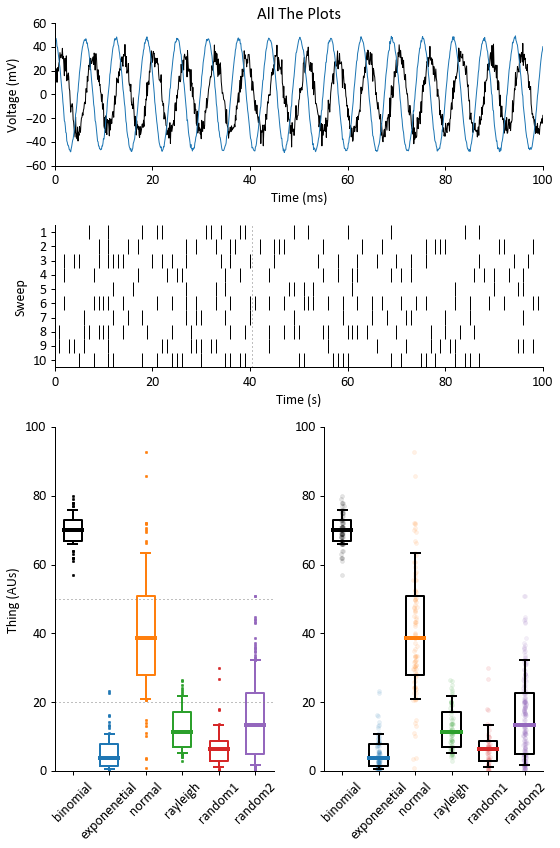

In [19]:
f = plt.figure(figsize=(8,12))
grid = gs.GridSpec(4, 2) # 4 rows, 2 columns

# make and assign subplots
ax1 = plt.subplot(grid[0,:])
ax2 = plt.subplot(grid[1,:])
ax3 = plt.subplot(grid[2:,0])
ax4 = plt.subplot(grid[2:,1])

# add actual plots to the subplots (not necessary to assign them to variables)
trace = ax1.plot(x,signal1)
trace = ax1.plot(x,signal2)
ras   = nuplot.nu_raster(ax2,df_raster,treatment=40.5)
bp1   = nuplot.nu_boxplot(ax3,df_boxplot,twenty=20,fifty=50)
sc    = nuplot.nu_scatter(ax4,df_boxplot,jitter=0.02,alpha=0.1)
bp2   = nuplot.nu_boxplot(ax4,df_boxplot,medians_only=True,show_outliers=False)

# clean up axes and add some labels
nuplot.simple_axis(ax1)
ax1.set_title('All The Plots')
ax1.set_ylabel('Voltage (mV)')
ax1.set_xlabel('Time (ms)')
ax2.set_ylabel('Sweep')
ax2.set_xlabel('Time (s)')
ax3.set_ylabel('Thing (AUs)')
plt.tight_layout()
# f.savefig('gridspec_test.pdf')

In [20]:
# make a bunch of data
series_list = [pd.Series(np.random.normal((10/(1+(np.exp(i)))),2,100)) for i in range(-10,10)]
df_boxplot2 = pd.concat(series_list,axis=1)

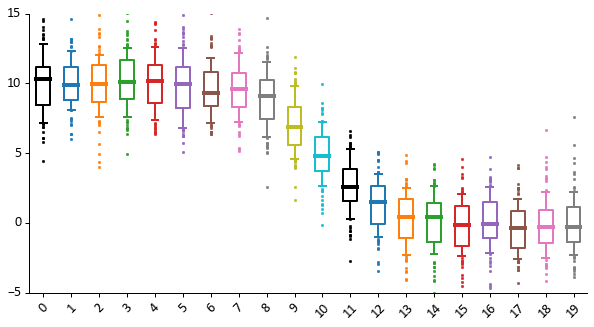

In [33]:
f, ax = plt.subplots()
bp1 = nuplot.nu_boxplot(ax,df_boxplot2,medians_only=False)
ax.set_ylim(-5,15)
plt.show()

In [22]:
Image(url='http://matplotlib.org/_images/lightness_00.png')

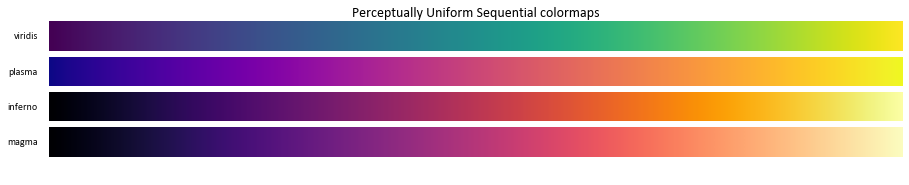

In [23]:
cmaps = [('Perceptually Uniform Sequential',
                            ['viridis', 'plasma', 'inferno', 'magma'])]
#                             ['viridis', 'plasma', 'inferno', 'magma','Blues_r', 'BuGn_r', 'BuPu_r',
#                              'GnBu_r', 'Greens_r', 'Greys_r', 'Oranges_r', 'OrRd_r','PuBu_r', 'PuBuGn_r', 
#                              'PuRd_r', 'Purples_r', 'RdPu_r','Reds_r', 'YlGn_r', 'YlGnBu_r', 'YlOrBr_r', 
#                              'YlOrRd_r','afmhot', 'bone','gist_heat', 'gray', 'hot','pink', 'summer'])]

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(figsize=(15,2),nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)
    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off all ticks & spines
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

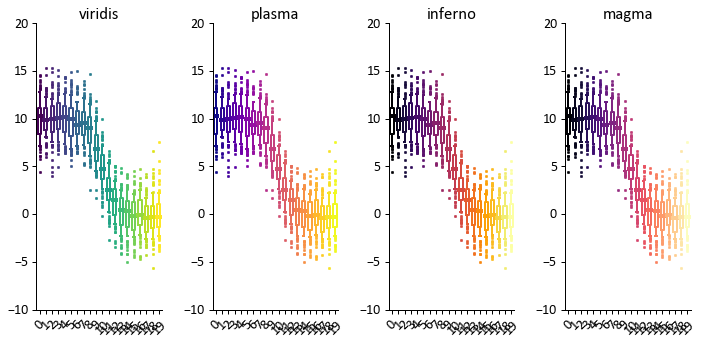

In [24]:
# best colormaps are going to be viridis, plasma, magma, and inferno (and their _r)
f, ax = plt.subplots(1,4, figsize=(10,5))
for i, name in enumerate(['viridis','plasma','inferno','magma']):
    nuplot.nu_boxplot(ax[i],df_boxplot2,cmap=mpl.cm.get_cmap(name))
    ax[i].set_title('{0}'.format(name))
f.tight_layout() 

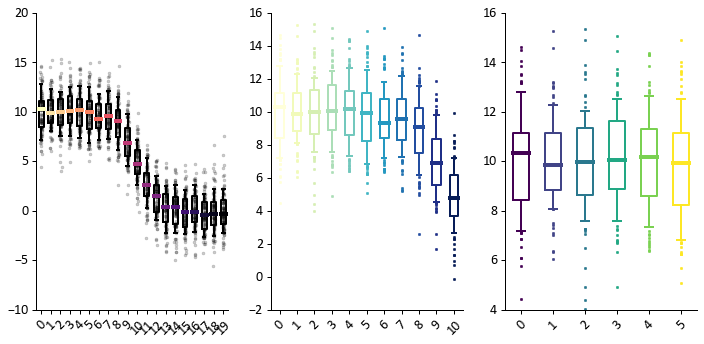

In [25]:
f, ax = plt.subplots(1,3, figsize=(10,5))
scp = nuplot.nu_scatter(ax[0],df_boxplot2,monocolor='000000',alpha=0.2,markersize=6)
bp1 = nuplot.nu_boxplot(ax[0],df_boxplot2,cmap='magma_r',medians_only=True,show_outliers=False)
bp2 = nuplot.nu_boxplot(ax[1],df_boxplot2.ix[:,:10],cmap='YlGnBu')
bp3 = nuplot.nu_boxplot(ax[2],df_boxplot2.ix[:,:5],cmap='viridis')
f.tight_layout()
# f.savefig('anothertest.pdf')

In [26]:
mpl.style.available

['seaborn-colorblind',
 'tableau10',
 'seaborn-bright',
 'seaborn-talk',
 'estep_style',
 'seaborn-deep',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-white',
 'seaborn-muted',
 'seaborn-darkgrid',
 'classic',
 'bmh',
 'seaborn-pastel',
 'ggplot',
 'grayscale',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-ticks',
 'seaborn-paper',
 'dark_background']

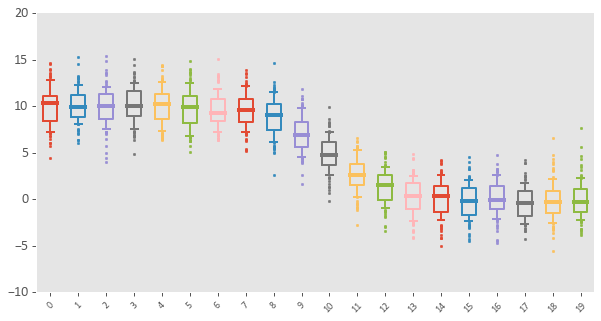

In [27]:
# can play with other stylesheets on a temporary basis
with mpl.style.context(('ggplot')):
    f, ax = plt.subplots()
    bp1 = nuplot.nu_boxplot(ax,df_boxplot2)

# Proper saving of files
### to use [tight_layout](http://matplotlib.org/users/tight_layout_guide.html) or not??
[savefig docs](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig)

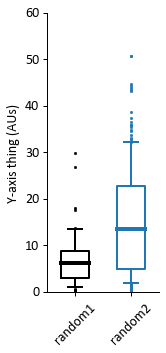

In [28]:
f,ax = plt.subplots(figsize=(2,5))
nuplot.nu_boxplot(ax,df_boxplot[['random1','random2']])
ax.set_ylabel('Y-axis thing (AUs)')
plt.show()

In [29]:
# f.savefig('test.pdf')
# f.savefig('test_bbtight.pdf',bbox_inches='tight')
# f.savefig('test_bbtight_pad.pdf',bbox_inches='tight',pad_inches=0)